<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 20px 20px;color:#FFFFFF"> Aykırı Değer Nedir ?
</h1>

 Aykırı değerler, diğer bir deyişle uç noktalar, değerleri popülasyonun geri kalanından çok farklı olan veri nesneleridir.*

 -*Aykırı değerler veri hataları olabilir ve tespit edilip , kaldırılmalıdır.*
 
 -*Veri hatası olmayan aykırı değerler analiz sonucumuzu çarptırabilir.*
 
 -*Aykırı değerler sahte veriler olabilir.*

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 20px 20px;color:#FFFFFF"> Aykırı Değer Tespiti
</h1>

 Kullanacağımız aykırı veri tespit aracı aykırı değer tespit edeceğimiz değişken sayısına bağlıdır .

 Eğer tek değişkende tespit etmek istiyorsak tek değişkenli aykırı değer tespiti , iki değişkende tespit etmek istiyorsak iki değişkenlı aykırı değer tespiti , eğer daha çok değişkende tespit etmek istiyorsak çok değişkenlı aykırı değer tespitini kullanacağız

<h3 style="background-color:#3b5998;font-family:newtimeroman;font-size:175%;text-align:center;border-radius: 20px 20px;color:#FFFFFF"> Sayısal Veri Türündeki Tek Değişkenli Aykırı Değer Tespiti
</h3>

- Verimiz numerik ise kutu grafiği ya da Q1-1.5*IQR , Q3+1.5*IQR istatistiksel aralığını kullanılırız .

#### Numerik verilerde aykırı değer tespiti

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [9]:
response_df = pd.read_csv("responses.csv")

In [10]:
response_df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [11]:
df = response_df.copy()
num_cols = [col for col in df.columns if df[col].dtype in ["float64", "int64"]]


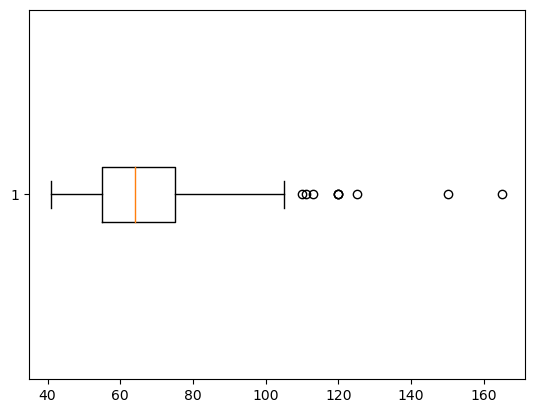

In [12]:
    fig = plt.boxplot(response_df.Weight.dropna(),vert=False)

In [13]:
print(fig)

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001C65E197B90>, <matplotlib.lines.Line2D object at 0x000001C65DDB8650>], 'caps': [<matplotlib.lines.Line2D object at 0x000001C65DDB8FD0>, <matplotlib.lines.Line2D object at 0x000001C65DDB9910>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001C65E197250>], 'medians': [<matplotlib.lines.Line2D object at 0x000001C65DDBA110>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001C65DDBAA10>], 'means': []}


Alt ve üst sınır


In [14]:
fig['caps'][0].get_data()

(array([41., 41.]), array([0.9625, 1.0375]))

In [15]:
fig['medians'][0].get_data()

(array([64., 64.]), array([0.925, 1.075]))

Aykırı değerleri gösterir


In [16]:
fig['fliers'][0].get_data()

(array([120., 110., 111., 120., 113., 125., 165., 120., 150.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [17]:
fig['boxes'][0].get_data()

(array([55., 55., 75., 75., 55.]), array([0.925, 1.075, 1.075, 0.925, 0.925]))

In [18]:
Q1 = response_df.Weight.quantile(0.25)
Q3 = response_df.Weight.quantile(0.75)
IQR = Q3-Q1
BM = (response_df.Weight > (Q3+1.5 *IQR)) | (response_df.Weight < (Q1-1.5 *IQR))

In [19]:
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,23.0,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,29.0,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow
859,5.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,...,20.0,190.0,125.0,1.0,male,right handed,secondary school,no,city,block of flats
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
973,5.0,3.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,...,20.0,175.0,120.0,2.0,female,right handed,secondary school,no,city,block of flats
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


#### Z skor ile aykırı değer tespiti

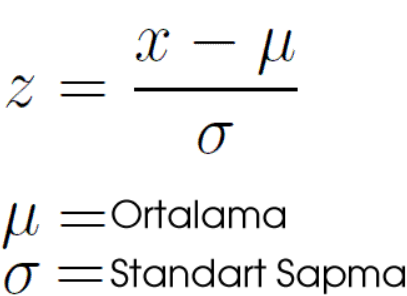

In [20]:
from scipy.stats import zscore
import numpy as np

In [21]:
z_scores = np.abs((response_df['Weight'] - response_df['Weight'].mean()) / response_df['Weight'].std())
aykiri_esik_degeri = 3
aykiri_degerler = response_df.Weight[(z_scores > aykiri_esik_degeri)]
print("Aykırı Değerler:")
print(aykiri_degerler)

Aykırı Değerler:
292    120.0
612    110.0
715    111.0
793    120.0
796    113.0
859    125.0
885    165.0
973    120.0
992    150.0
Name: Weight, dtype: float64


#### Grubbs Testi:
 Veri setindeki en büyük veya en küçük değerler arasındaki farkın, standart sapma ölçüsüne göre anormal olup olmadığını kontrol eder. Bu, tek bir aykırı değeri tespit etmeyi amaçlar.

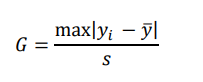

In [22]:
def grubbs_test(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    n = len(data)
    g_calculated = max(abs(data - mean)) / std_dev
    critical_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    if g_calculated > critical_value:
        return "Outlier detected"
    else:
        return "No outliers"
print("Grubbs Testi sonucu:", grubbs_test(response_df['Weight']))


Grubbs Testi sonucu: Outlier detected


##### Dixon's Q Testi:
Bu test, bir veri noktasının komşu değerlere olan oranını hesaplar. Bu, veri setinde tek bir aykırı değeri tespit etmeyi amaçlar.

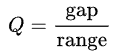

In [23]:
def dixon_test(data):
    data = np.sort(data)
    q = (data[1] - data[0]) / (data[-1] - data[0])
    q_critical = 0.29  
    if q > q_critical:
        return "Outlier detected"
    else:
        return "No outliers"
print("Dixon's Q Testi sonucu:", dixon_test(response_df['Weight']))


Dixon's Q Testi sonucu: No outliers


#### MAD Değeri

 Bir veri setindeki değerlerin merkezden, genellikle medyan değerinden, ne kadar uzaklıkta olduğunu ölçen bir istatistiksel ölçüttür. MAD, aykırı değerlerin tespit edilmesi için kullanılır.

In [24]:
def mad_based_outlier(data, threshold=3):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified_z_score = 0.6745 * (data - median) / mad
    return np.abs(modified_z_score) > threshold


In [25]:
outliers = response_df[mad_based_outlier(response_df['Weight'])]
outliers

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats


<h3 style="background-color:#3b5998;font-family:newtimeroman;font-size:175%;text-align:center;border-radius: 20px 20px;color:#FFFFFF"> Kategorik Veri Tipinde Tek  Değişkenin Aykırı Değer Tespiti
</h3>

In [26]:
response_df.Education.value_counts()

Education
secondary school                    621
college/bachelor degree             212
masters degree                       81
primary school                       80
currently a primary school pupil     10
doctorate degree                      5
Name: count, dtype: int64

<Axes: xlabel='Education'>

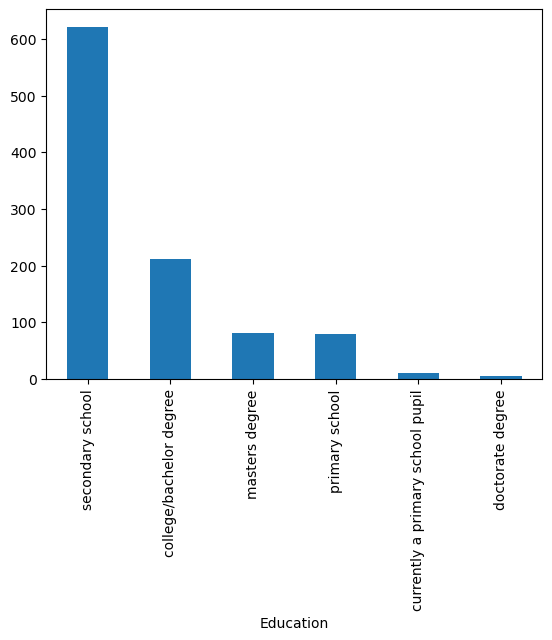

In [27]:
response_df.Education.value_counts().plot.bar()

<h3 style="background-color:#3b5998;font-family:newtimeroman;font-size:175%;text-align:center;border-radius: 20px 20px;color:#FFFFFF"> Sayısal Veri Türündeki İki Değişkenli Aykırı Değer Tespiti
</h3>


<Axes: xlabel='Weight', ylabel='Height'>

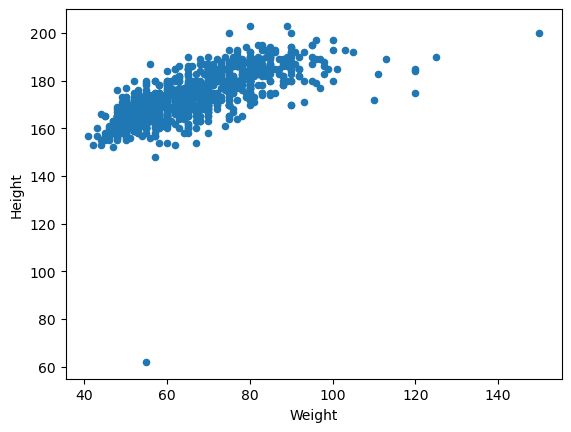

In [28]:
response_df.plot.scatter(x='Weight',
y='Height') 

##### *Saçılım grafiğinde görüldüğü üzere iki aykırı değer gözüküyor .*

In [29]:
BM = (response_df.Weight>130) | (response_df.Height<70)

In [30]:
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
676,5.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,20.0,62.0,55.0,2.0,female,right handed,college/bachelor degree,no,city,house/bungalow
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


<h3 style="background-color:#3b5998;font-family:newtimeroman;font-size:175%;text-align:center;border-radius: 20px 20px;color:#FFFFFF"> İki Kategorik Değişkenin Aykırı Değer Tespiti
</h3>


In [31]:
cont_table = pd.crosstab(response_df["Education"],response_df["God"])

In [32]:
cont_table

God,1.0,2.0,3.0,4.0,5.0
Education,,,,,
college/bachelor degree,48,17,46,42,58
currently a primary school pupil,0,1,2,1,6
doctorate degree,1,1,1,0,2
masters degree,8,3,20,15,35
primary school,12,11,21,15,21
secondary school,118,89,126,92,195


<Axes: xlabel='God', ylabel='Education'>

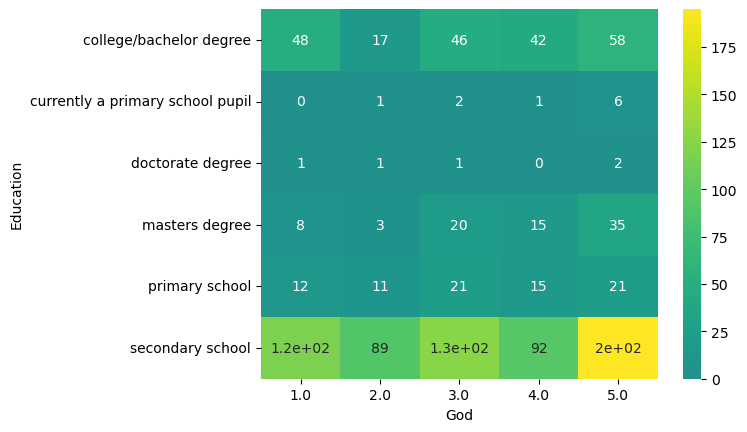

In [33]:
sns.heatmap(cont_table,annot=True,center=0.5,cmap="viridis")

In [34]:
response_df.query('Education== "currently a primary school pupil" & God==2')


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
950,5.0,3.0,2.0,3.0,NaN,4.0,2.0,4.0,5.0,5.0,...,15.0,190.0,85.0,0.0,male,left handed,currently a primary school pupil,yes,village,house/bungalow


In [35]:
response_df.query('Education== "currently a primary school pupil" & God==4')


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
158,5.0,3.0,4.0,2.0,1.0,3.0,2.0,5.0,4.0,1.0,...,15.0,160.0,48.0,2.0,female,right handed,currently a primary school pupil,no,village,block of flats


In [36]:
response_df.query('Education== "doctorate degree" & God==1')


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
668,5.0,3.0,1.0,2.0,3.0,4.0,2.0,2.0,5.0,5.0,...,27.0,186.0,82.0,1.0,male,left handed,doctorate degree,yes,city,house/bungalow


In [37]:
response_df.query('Education== "doctorate degree" & God==2')


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow


In [38]:
response_df.query('Education== "doctorate degree" & God==3')


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow


<h3 style="background-color:#3b5998;font-family:newtimeroman;font-size:175%;text-align:center;border-radius: 20px 20px;color:#FFFFFF"> Bir Kategorik Bir Sayısal Değişkenin Aykırı Değer Tespiti
</h3>


<Axes: xlabel='Age', ylabel='Education'>

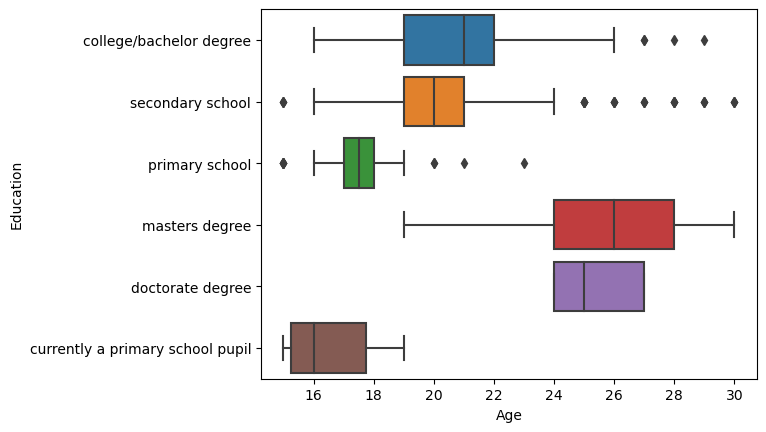

In [39]:
sns.boxplot(x=response_df.Age,y=response_df.Education)

In [40]:
BM1 = (response_df.Education=='college/bachelor degree') & (response_df.Age>26)

In [41]:
BM2 = (response_df.Education == 'secondary school') & ((response_df.Age>24) |
(response_df.Age<16))

In [42]:
BM3 = (response_df.Education == 'primary school') & ((response_df.Age>19) |
(response_df.Age<16))

In [43]:
BM = BM1 | BM2 | BM3

In [44]:
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
30,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,2.0,...,25.0,183.0,87.0,1.0,male,right handed,secondary school,no,city,block of flats
40,4.0,3.0,4.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,...,26.0,172.0,62.0,1.0,female,right handed,secondary school,no,city,block of flats
49,5.0,4.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,3.0,...,20.0,157.0,41.0,1.0,female,right handed,primary school,no,city,block of flats
72,5.0,3.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,2.0,...,28.0,168.0,52.0,1.0,female,right handed,secondary school,no,city,block of flats
128,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,...,15.0,173.0,49.0,3.0,female,left handed,primary school,no,city,house/bungalow
132,5.0,4.0,3.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,...,15.0,170.0,51.0,1.0,female,right handed,primary school,no,village,house/bungalow
167,3.0,3.0,3.0,2.0,2.0,NaN,2.0,3.0,4.0,3.0,...,21.0,183.0,98.0,1.0,male,right handed,primary school,no,village,house/bungalow
174,5.0,2.0,1.0,5.0,3.0,3.0,3.0,1.0,1.0,1.0,...,26.0,183.0,78.0,0.0,male,right handed,secondary school,yes,city,house/bungalow
202,5.0,3.0,5.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,...,15.0,181.0,63.0,0.0,male,right handed,primary school,yes,city,block of flats
215,1.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,...,27.0,180.0,80.0,2.0,male,right handed,secondary school,no,city,block of flats


<h3 style="background-color:#3b5998;font-family:newtimeroman;font-size:175%;text-align:center;border-radius: 20px 20px;color:#FFFFFF"> Çok Değişkenli Aykırı Değer Tespiti
</h3>


#### -*Kümeleme analizi kullanılır.*

In [45]:
dimensions = ["Country","Metal or Hardrock","Folk","Musical"]

In [46]:
Xs = response_df[dimensions]

In [47]:
Xs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1005 non-null   float64
 1   Metal or Hardrock  1007 non-null   float64
 2   Folk               1005 non-null   float64
 3   Musical            1008 non-null   float64
dtypes: float64(4)
memory usage: 31.7 KB


In [48]:
Q3 = Xs.quantile(0.75)
Q1 = Xs.quantile(0.25)
IQR = Q3-Q1
Xs = Xs.fillna(Q3+IQR+1.5)

In [49]:
Xs = (Xs - Xs.min())/(Xs.max()-Xs.min())


In [50]:
from sklearn.cluster import KMeans
for k in range(2,8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Xs)
    print('k={}'.format(k))
    for i in range(k):
        BM = kmeans.labels_==i
        print('Cluster {}: {}'.format(i,Xs[BM].index.values))
    print('--------- Divider ----------')

k=2
Cluster 0: [   1    2    5    8   12   15   18   19   20   21   24   26   32   34
   37   39   41   42   46   49   51   52   54   55   59   62   65   66
   68   75   82   83   84   85   86   89   91   93   96  100  101  104
  105  107  108  109  120  123  124  125  127  128  130  135  141  146
  147  150  151  154  157  159  160  161  166  167  169  172  175  176
  177  178  180  181  182  189  190  193  196  198  200  201  203  204
  205  206  209  210  214  216  221  222  224  226  227  231  233  234
  235  236  245  248  249  255  257  258  260  264  267  269  270  271
  272  275  276  277  280  281  291  293  295  300  301  303  307  312
  314  320  322  325  328  330  338  339  345  347  350  352  356  357
  361  362  363  364  365  367  369  370  371  377  381  383  384  385
  386  393  395  398  399  401  402  412  413  417  420  423  425  426
  429  432  433  435  438  444  452  454  471  473  475  476  477  479
  481  483  484  487  488  502  505  506  510  513  515  516  

k=4
Cluster 0: [   1    5    8   12   15   19   20   21   24   32   34   37   39   42
   49   51   55   59   65   66   68   82   83   89   96  101  104  105
  107  108  120  125  130  135  141  146  147  151  160  161  166  167
  169  175  180  182  189  190  196  200  203  204  206  214  216  231
  233  235  248  257  258  264  269  270  271  277  280  281  293  301
  312  320  322  330  339  345  347  350  352  357  364  365  367  369
  370  381  383  384  386  393  395  398  401  412  413  417  420  423
  425  426  429  432  435  438  452  454  471  473  476  477  479  481
  483  484  487  502  506  513  516  517  524  526  529  538  539  542
  543  544  562  571  572  573  579  581  587  589  593  595  600  602
  607  610  612  613  621  628  630  631  632  639  640  649  653  655
  656  659  660  663  665  666  668  670  674  681  682  687  691  697
  705  707  709  718  719  720  727  729  730  738  743  747  755  760
  763  765  773  786  790  792  793  796  798  801  802  803  

k=6
Cluster 0: [   4    6    9   13   27   29   35   36   38   50   51   53   57   58
   67  100  110  111  129  133  136  139  149  156  174  186  188  191
  198  225  228  236  254  256  257  262  264  266  278  302  311  319
  335  340  343  348  354  363  370  378  379  380  388  392  396  397
  399  402  406  408  414  418  421  428  449  450  461  467  470  492
  499  500  501  505  507  509  512  521  530  534  540  552  553  554
  555  569  574  575  582  591  592  593  601  615  618  619  625  627
  629  633  634  635  637  638  642  644  648  654  672  688  696  698
  699  701  721  722  726  735  741  745  750  751  776  784  814  826
  847  853  858  859  865  872  891  892  899  906  907  909  913  929
  938  944  948  954  958  961  986 1000 1003 1009]
Cluster 1: [  10   14   23   25   31   34   44   45   47   48   60   61   64   69
   70   72   80   81   83   87   90   95  103  112  114  115  117  122
  140  152  168  171  173  183  184  185  192  211  217  218  237  238

##### -*K-Meansı çalıştırdığımızda eğer hiçbir küme yalnızca birkaç veri noktasından oluşmuyorsa, bu durumda aykırı değerlerin belirgin olmadığını düşünebiliriz.*

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 20px 20px;color:#FFFFFF"> Aykırı Değerlerle Başa Çıkma Yöntemleri 
</h1>

<h3 style="background-color:#3b5998;font-family:newtimeroman;font-size:175%;text-align:left;color:#FFFFFF"> 1 - Bir şey yapmamak
</h3>



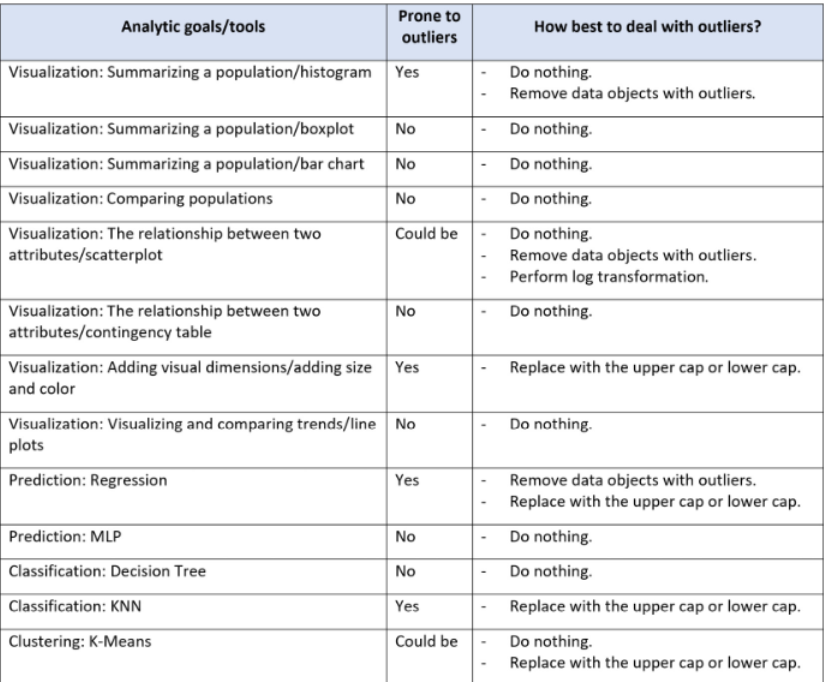


<h3 style="background-color:#3b5998;font-family:newtimeroman;font-size:175%;text-align:left;color:#FFFFFF"> 2- Üst Sınır Veya Alt Sınıra Baskılamak
</h3>


 *-Aykırı değer tek değişkenliyse*
 
 *-Analiz hedefimiz veya kullandığımız araç aykırı değere hassas ise*
 
 *-Değiştirmemiz analiz sonuçlarımızı etkilemeyecekse*


num_cols = [col for col in df.columns if df[col].dtype in ['float64', 'int64'] and col != 'Outcome']


for col in num_cols:
    Q1 = df[col].quantile(0.35)
    Q3 = df[col].quantile(0.65)
    IQR = Q3-Q1
    BM = (df[col] > (Q3+1.5 *IQR)) | (df[col] < (Q1-1.5 *IQR))
    up_limit = Q3 + 1.5 * IQR
    low_limit = Q1 - 1.5 * IQR
    up_outliers = df[col] > up_limit
    low_outliers = df[col] < low_limit
    df.loc[up_outliers, col] = up_limit
    df.loc[low_outliers, col] = low_limit

<h3 style="background-color:#3b5998;font-family:newtimeroman;font-size:175%;text-align:left;color:#FFFFFF"> 3- Logaritmik Dönüşüm
</h3>

 *- Değişkenin üstel bir dağılımı takip ettiği durumlarda, bazı veri noktalarının geri kalan popülasyondan çok farklı olması normal olabilir. Bu durumda, bu aykırılıklarla başa çıkmak ve veriyi daha tutarlı hale getirmek için logaritmik dönüşüm uygulamak en iyi yaklaşım olabilir.*
 
 *- Sağa çarpıksa Logaritmik dönüşüm, bu tür durumlarda veriyi daha normal veya simetrik bir dağılım haline getirerek analiz için daha uygun hale getirir.* 
 
 *- Sola çarpıksa - ile çarpılır sağa çarpık hale getirilir sonrasında log ya da kök x karekök dönüşümü ile normalize edilir. ve normal dağılıp dağılmadığı tekrar incelenir.*


df_log = np.log1p(df)

<h3 style="background-color:#3b5998;font-family:newtimeroman;font-size:175%;text-align:left;color:#FFFFFF"> 4- Aykırı Değerleri Kaldırmak
</h3>

#### -*Diğer yöntemler işe yaramadığı zamanlarda bu yöntemi kullanabiliriz.*

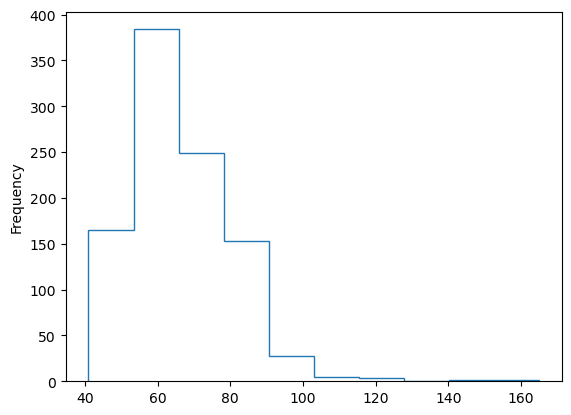

In [51]:
response_df.Weight.plot.hist(histtype='step')
plt.show()

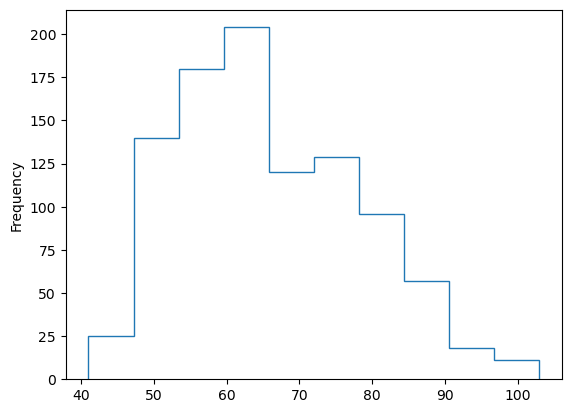

In [52]:
BM = response_df.Weight<105
response_df.Weight[BM].plot.hist(histtype='step')
plt.show()

 *-Burada asıl amacımız çok önemlidir. Populasyon dağılımının çoğunluğu 40 ve 100 arasındadır .Eğer amacımız bunu göstermek ise  aykırı değerleri yok sayabiliriz fakat amacımız gerçek değerleri göstermek ise aykırı değerleri kaldırmamalıyız.*

### Örnek 2 :
 Linear Regresyonun aykırı değere eğilimli olduğunu göstermek için

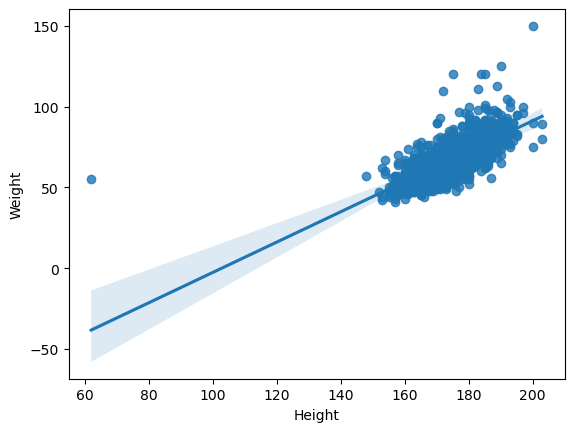

In [53]:
sns.regplot(x="Height",y="Weight",data=response_df)
plt.show()

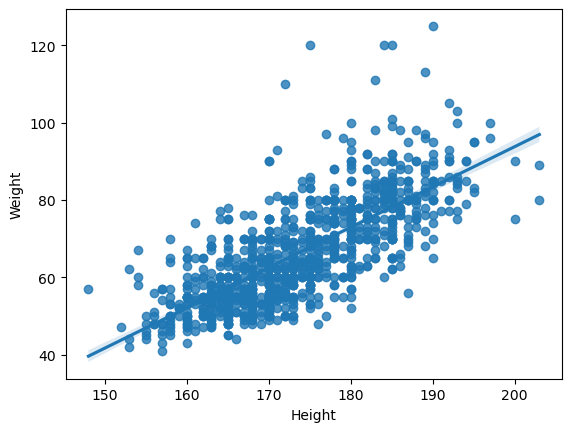

In [54]:
BM = (response_df.Weight>130) | (response_df.Height<70)
sns.regplot(x="Height",y="Weight",data=response_df[~BM])
plt.show()    

In [55]:
select_attributes = ['Weight','Height','Gender']
pre_process_df = pd.DataFrame(response_df[select_attributes])

In [56]:
pre_process_df.dropna(inplace=True)


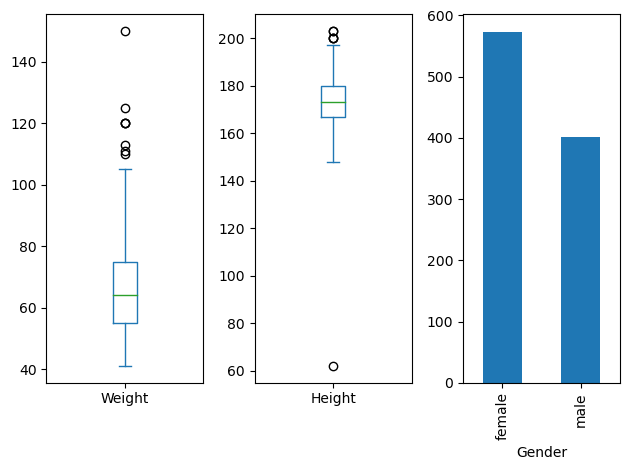

In [57]:
num_attributes = ['Weight','Height']
for i,att in enumerate(num_attributes):
    plt.subplot(1,3,i+1)
    pre_process_df[att].plot.box()

plt.subplot(1,3,3)
pre_process_df.Gender.value_counts().plot.bar()
plt.tight_layout()
plt.show()


In [58]:
Q3 = pre_process_df.Weight.quantile(0.75)
Q1 = pre_process_df.Weight.quantile(0.25)
IQR = Q3 - Q1

upper_cap = Q3+IQR*1.5

BM = pre_process_df.Weight > upper_cap
pre_process_df.loc[pre_process_df[BM].index,'Weight'] = upper_cap

<Axes: >

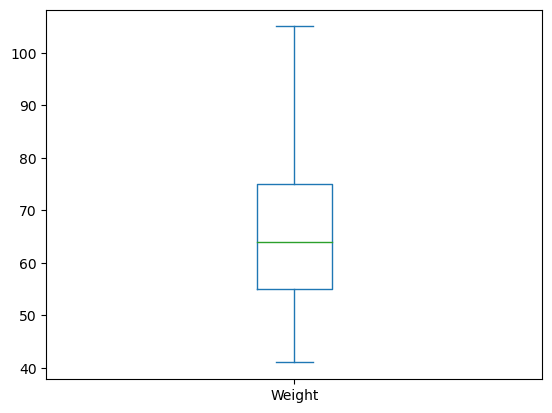

In [59]:
pre_process_df.Weight.plot.box()


In [60]:
Q3 = pre_process_df.Height.quantile(0.75)
Q1 = pre_process_df.Height.quantile(0.25)
IQR = Q3 - Q1

lower_cap = Q1-IQR*1.5
upper_cap = Q3+IQR*1.5

BM = pre_process_df.Height < lower_cap
pre_process_df.loc[pre_process_df[BM].index,'Height'] = lower_cap

BM = pre_process_df.Height > upper_cap
pre_process_df.loc[pre_process_df[BM].index,'Height'] = upper_cap

<Axes: >

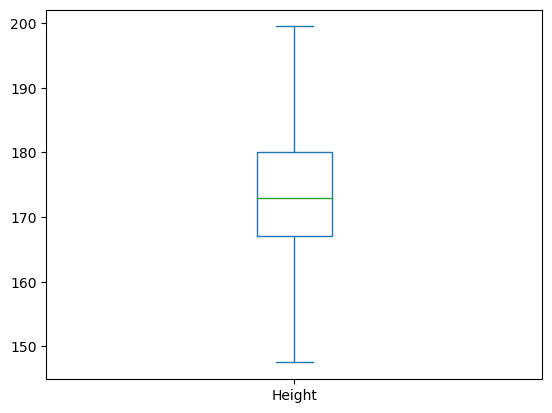

In [61]:
pre_process_df.Height.plot.box()


<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px 20px;color:#FFFFFF"> İki değişkenli Aykırı Değerlerin Tespit Edilmesi Ve Baş Edilmesi
</h1>

<Axes: xlabel='Height', ylabel='Weight'>

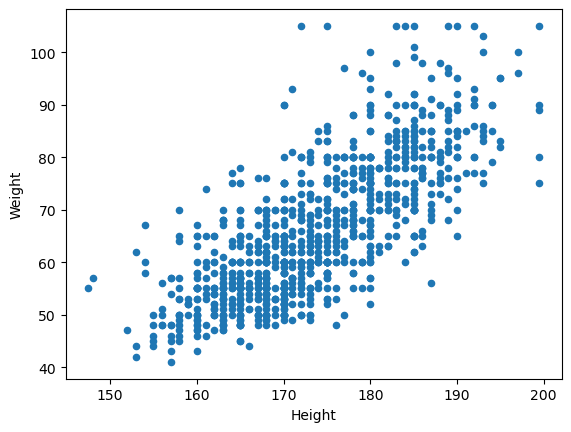

In [62]:
pre_process_df.plot.scatter(x='Height',y='Weight')


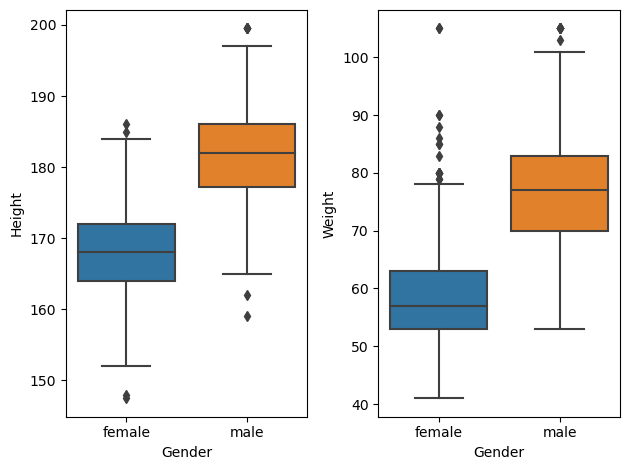

In [63]:
plt.subplot(1,2,1)
sns.boxplot(y=pre_process_df.Height,x=pre_process_df.Gender)
plt.subplot(1,2,2)
sns.boxplot(y=pre_process_df.Weight, x=pre_process_df.Gender)
plt.tight_layout()

In [64]:
for poss in pre_process_df.Gender.unique():
    BM = pre_process_df.Gender == poss
    wdf = pre_process_df[BM]
    Q3 = wdf.Height.quantile(0.75)
    Q1 = wdf.Height.quantile(0.25)
    IQR = Q3 - Q1

    lower_cap = Q1-IQR*1.5
    upper_cap = Q3+IQR*1.5
    
    BM = wdf.Height > upper_cap
    pre_process_df.loc[wdf[BM].index,'Height'] = upper_cap
    
    BM = wdf.Height < lower_cap
    pre_process_df.loc[wdf[BM].index,'Height'] = lower_cap

In [65]:
for poss in pre_process_df.Gender.unique():
    BM = pre_process_df.Gender == poss
    wdf = pre_process_df[BM]
    Q3 = wdf.Weight.quantile(0.75)
    Q1 = wdf.Weight.quantile(0.25)
    IQR = Q3 - Q1

    lower_cap = Q1-IQR*1.5
    upper_cap = Q3+IQR*1.5
    
    BM = wdf.Weight > upper_cap
    pre_process_df.loc[wdf[BM].index,'Weight'] = upper_cap
    
    BM = wdf.Weight < lower_cap
    pre_process_df.loc[wdf[BM].index,'Weight'] = lower_cap

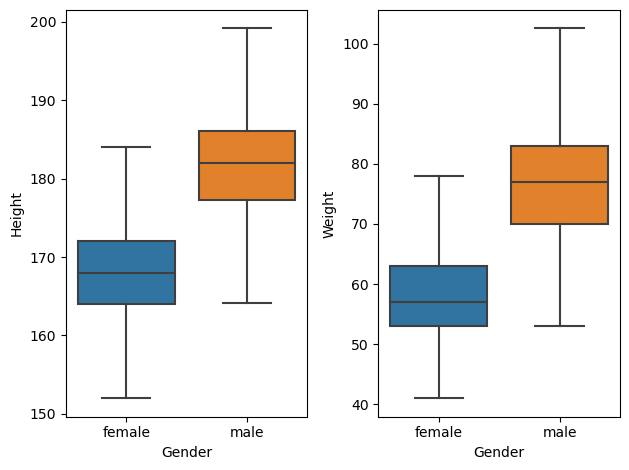

In [66]:
plt.subplot(1,2,1)
sns.boxplot(y=pre_process_df.Height,x=pre_process_df.Gender)
plt.subplot(1,2,2)
sns.boxplot(y=pre_process_df.Weight, x=pre_process_df.Gender)
plt.tight_layout()

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px 20px;color:#FFFFFF"> Çok Değişkenli Aykırı Değer Tespiti Ve Başa Çıkma
</h1>

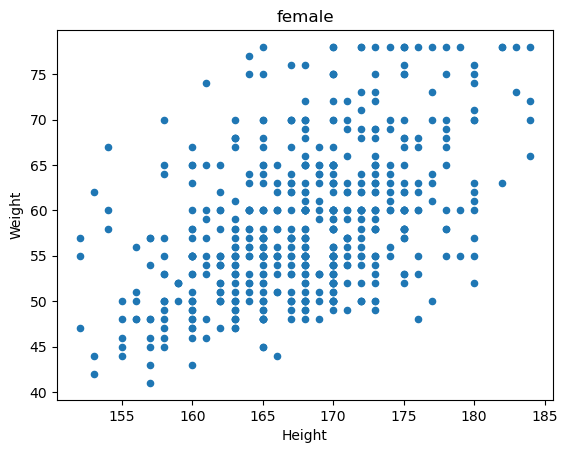

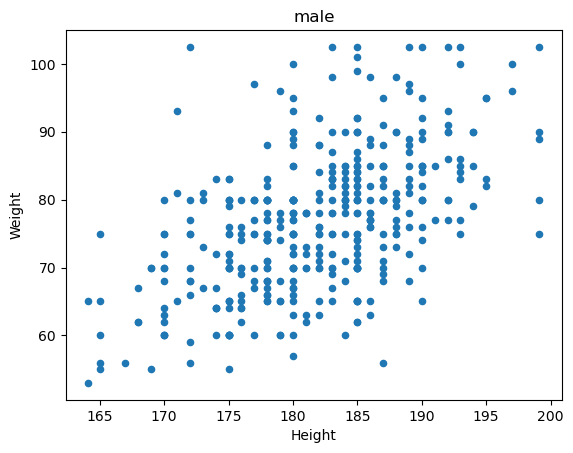

In [67]:
cat_attribute_poss = pre_process_df.Gender.unique()
for i,poss in enumerate(cat_attribute_poss):
    BM = pre_process_df.Gender == poss
    pre_process_df[BM].plot.scatter(x='Height',y='Weight')
    plt.title(poss)
    plt.show()

In [68]:
pre_process_df.Gender.replace({'male':0,'female':1},inplace=True)


In [69]:
from sklearn.linear_model import LinearRegression

X = ['Height','Gender']
y = 'Weight'

data_X = pre_process_df[X]
data_y = pre_process_df[y]

lm = LinearRegression()
lm.fit(data_X, data_y)

LinearRegression()

In [70]:
print('intercept (b0) ', lm.intercept_)
coef_names = ['b1','b2']
print(pd.DataFrame({'Predictor': data_X.columns,
                    'coefficient Name':coef_names, 
                    'coefficient Value': lm.coef_}))

intercept (b0)  -51.10382582783839
  Predictor coefficient Name  coefficient Value
0    Height               b1           0.704025
1    Gender               b2          -8.602017


<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">  Örnek 4
</h1>

In [71]:
select_attributes = ['Weight','Height','Gender']
pre_process_df = pd.DataFrame(response_df[select_attributes])
pre_process_df.dropna(inplace=True)
pre_process_df.Gender.replace({'male':0,'female':1},inplace=True)

In [72]:
from sklearn.neural_network import MLPRegressor

X = ['Height','Gender']
y = 'Weight'

data_X = pre_process_df[X]
data_y = pre_process_df[y]

mlp = MLPRegressor(hidden_layer_sizes=5, max_iter=3000)
mlp.fit(data_X, data_y)

MLPRegressor(hidden_layer_sizes=5, max_iter=3000)

In [73]:
newData = pd.DataFrame({'Height':189.5,'Gender':0},
                       index=[0])
mlp.predict(newData)

array([79.78713172])

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">  Örnek 5
</h1>


In [74]:
community_df = pd.read_csv('chicago_population.csv')
community_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        77 non-null     object 
 1   population  77 non-null     int64  
 2   income      77 non-null     int64  
 3   latino      77 non-null     float64
 4   black       77 non-null     float64
 5   white       77 non-null     float64
 6   asian       77 non-null     float64
 7   other       77 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 4.9+ KB


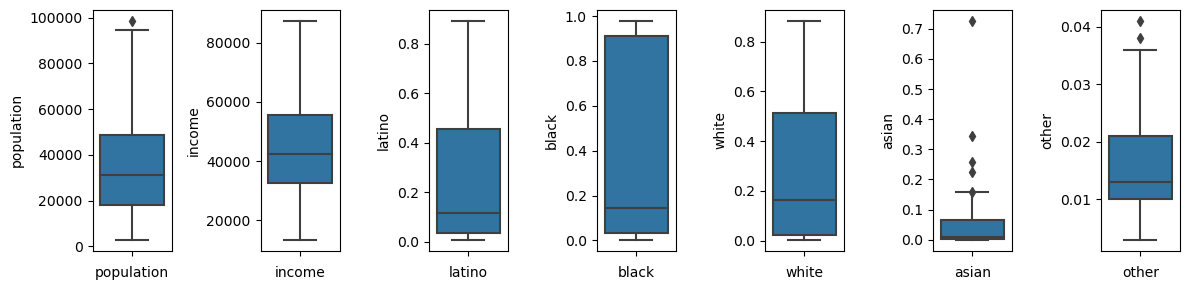

In [75]:
numerical_atts = ['population', 'income', 'latino', 'black', 'white', 'asian','other']
plt.figure(figsize=(12,3))
for i,att in enumerate(numerical_atts):
    plt.subplot(1,len(numerical_atts),i+1)
    sns.boxplot(y=community_df[att])
    plt.xlabel(att)
plt.tight_layout()
plt.show()

In [76]:
pre_process_df = community_df.set_index("name")
candidate_atts = ["population","asian","other"]
for att in candidate_atts:
    Q3 = pre_process_df[att].quantile(0.75)
    Q1 = pre_process_df[att].quantile(0.25)
    IQR = Q3-Q1
    lower_cap = Q1-IQR*1.5
    upper_cap = Q3 + IQR*1.5
    BM = pre_process_df[att] < lower_cap
    candidate_index = pre_process_df[BM].index
    pre_process_df.loc[candidate_index,att] = lower_cap
    BM=pre_process_df[att] > upper_cap
    candidate_index = pre_process_df[BM].index
    pre_process_df.loc[candidate_index,att] = upper_cap
    

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">  İki ve Çok değişkenli aykırı değer tespiti ve başa çıkma yöntemleri
</h1>

###### *-En iyi yöntem hiçbir şey yapmamaktır.*

In [77]:
from sklearn.cluster import KMeans
dimensions = ['population', 'income', 'latino', 'black', 'white', 'asian','other']
Xs = pre_process_df[dimensions]
Xs = (Xs - Xs.min())/(Xs.max()-Xs.min())
kmeans = KMeans(n_clusters=5)
kmeans.fit(Xs)

KMeans(n_clusters=5)

In [78]:
for i in range(5):
    BM = kmeans.labels_==i
    print('Cluster {}: {}'.format(i,pre_process_df[BM].index.values))

Cluster 0: ['Lake View' 'Lincoln Park' 'Near North Side' 'Portage Park' 'Irving Park'
 'Logan Square' 'West Town']
Cluster 1: ['Austin' 'West Garfield Park' 'East Garfield Park' 'North Lawndale'
 'Oakland' 'Fuller Park' 'Grand Boulevard' 'Kenwood' 'Washington Park'
 'Woodlawn' 'South Shore' 'Chatham' 'Avalon Park' 'South Chicago'
 'Burnside' 'Calumet Heights' 'Roseland' 'Pullman' 'South Deering'
 'West Pullman' 'Riverdale' 'West Englewood' 'Englewood'
 'Greater Grand Crossing' 'Auburn Gresham' 'Washington Heights'
 'Morgan Park']
Cluster 2: ['North Center' 'Edison Park' 'Norwood Park' 'Jefferson Park'
 'Forest Glen' 'Dunning' 'Beverly' 'Mount Greenwood' "O'Hare"]
Cluster 3: ['Montclare' 'Belmont Cragin' 'Hermosa' 'Avondale' 'Humboldt Park'
 'South Lawndale' 'Lower West Side' 'East Side' 'Hegewisch'
 'Garfield Ridge' 'Archer Heights' 'Brighton Park' 'New City'
 'West Elsdon' 'Gage Park' 'Clearing' 'West Lawn' 'Chicago Lawn' 'Ashburn']
Cluster 4: ['Rogers Park' 'West Ridge' 'Uptown' 'Lin

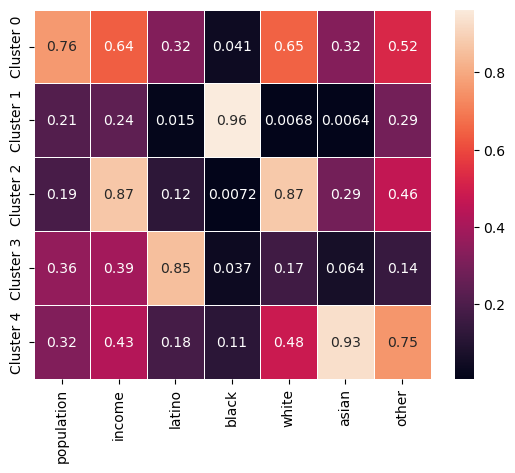

In [79]:
clusters = ['Cluster {}'.format(i) for i in range(5)]

Centroids = pd.DataFrame(0.0, index =  clusters,
                        columns = Xs.columns)
for i,clst in enumerate(clusters):
    BM = kmeans.labels_==i
    Centroids.loc[clst] = Xs[BM].median(axis=0)

sns.heatmap(Centroids, linewidths=.5, annot=True
                    )
plt.show()